In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported.")

Libraries imported.


In [2]:
try:
    df = pd.read_csv('your_dataset.csv')
    print("Dataset loaded successfully!")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print("Error: Dataset file not found. Please ensure 'your_dataset.csv' is in the correct directory.")
    exit()

Dataset loaded successfully!

First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  T


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

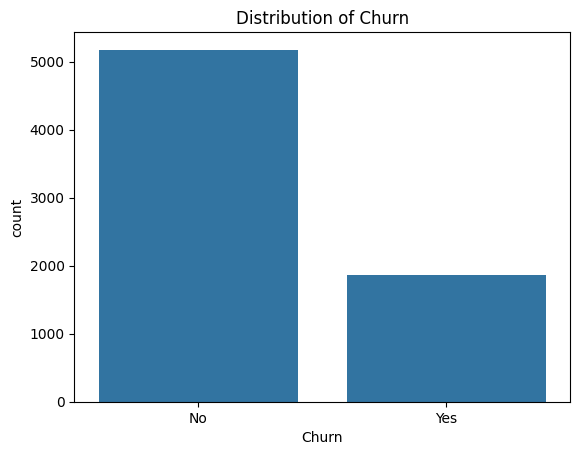

In [3]:
# Initial exploration
print("\nDataset information:")
df.info()

print("\nSummary statistics of numerical features:")
print(df.describe())

print("\nValue counts of the target variable 'Churn':")
print(df['Churn'].value_counts())
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

In [4]:
# Identify missing values
print("\nMissing values:")
print(df.isnull().sum())

# Handle missing values (if any) - Example: Imputing or dropping
# For 'TotalCharges', if it has missing values and is numeric, we might impute with the median.
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Missing values after handling:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
# Identify categorical and numerical features
categorical_features = df.select_dtypes(include='object').columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the customer ID as it's usually not informative for the model
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)
    if 'customerID' in categorical_features:
        categorical_features.remove('customerID')
    print("\n'customerID' column removed.")
else:
    print("\n'customerID' column not found.")

print("\nCategorical Features:", categorical_features)
print("Numerical Features:", numerical_features)


'customerID' column removed.

Categorical Features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical Features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [6]:
# Encode categorical features
label_encoder = LabelEncoder()
for col in ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'Contract', 'PaperlessBilling',
            'PaymentMethod', 'Churn', 'gender']: # Include 'gender' if present
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])

# One-hot encode remaining categorical features (if any after initial encoding)
df = pd.get_dummies(df, columns=[col for col in categorical_features if col not in ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'Contract', 'PaperlessBilling',
            'PaymentMethod', 'Churn', 'gender']], drop_first=True)

print("\nProcessed dataset information after encoding:")
df.info()


Processed dataset information after encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  


In [7]:
# Scale numerical features
numerical_features = [col for col in numerical_features if col != 'Churn']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("\nProcessed dataset information after scaling:")
df.info()
print("\nFirst 5 rows of the scaled data:")
print(df.head())


Processed dataset information after scaling:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   float64
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 

In [8]:
# ## 4. Feature Engineering (Optional)

# Example 1: Tenure Grouping
bins = [0, 12, 24, 36, 48, 60, np.inf]
labels = ['0-12 Months', '13-24 Months', '25-36 Months', '37-48 Months', '49-60 Months', '60+ Months']
if 'tenure' in df.columns:
    df['Tenure_Group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)
    df = pd.get_dummies(df, columns=['Tenure_Group'], drop_first=True)
    print("\n'Tenure_Group' feature created and one-hot encoded.")
else:
    print("\n'tenure' column not found, skipping 'Tenure_Group' feature engineering.")

print("\nDataset information after optional feature engineering:")
df.info()
print("\nFirst 5 rows after optional feature engineering:")
print(df.head())


'Tenure_Group' feature created and one-hot encoded.

Dataset information after optional feature engineering:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     7043 non-null   int32  
 1   SeniorCitizen              7043 non-null   float64
 2   Partner                    7043 non-null   int32  
 3   Dependents                 7043 non-null   int32  
 4   tenure                     7043 non-null   float64
 5   PhoneService               7043 non-null   int32  
 6   MultipleLines              7043 non-null   int32  
 7   InternetService            7043 non-null   int32  
 8   OnlineSecurity             7043 non-null   int32  
 9   OnlineBackup               7043 non-null   int32  
 10  DeviceProtection           7043 non-null   int32  
 11  TechSupport                7043 non-null   int32  

In [9]:
# ## 5. Model Selection

# Split the data into training and testing sets
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nShape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)
print("Shape of testing target:", y_test.shape)
print("Shape of training target:", y_train.shape)


Shape of training data: (4930, 24)
Shape of testing data: (2113, 24)
Shape of testing target: (2113,)
Shape of training target: (4930,)


In [10]:
# Initialize models
logistic_regression = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)

print("\nModels initialized: Logistic Regression, Random Forest, Gradient Boosting.")


Models initialized: Logistic Regression, Random Forest, Gradient Boosting.


In [11]:
# ## 6. Model Training

# Train Logistic Regression
logistic_regression.fit(X_train, y_train)
print("\nLogistic Regression trained.")


Logistic Regression trained.


In [12]:
# Train Random Forest
random_forest.fit(X_train, y_train)
print("Random Forest trained.")

Random Forest trained.


In [13]:
# Train Gradient Boosting
gradient_boosting.fit(X_train, y_train)
print("Gradient Boosting trained.")

Gradient Boosting trained.



--- Logistic Regression Evaluation ---
Accuracy: 0.8035967818267865

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1552
           1       0.65      0.57      0.60       561

    accuracy                           0.80      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.80      0.80      2113



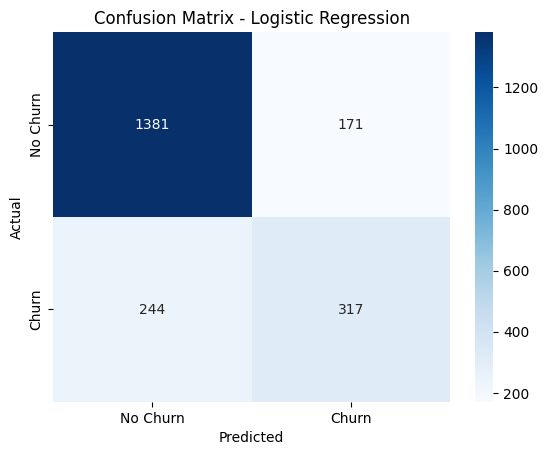

In [14]:
# ## 7. Model Evaluation

# Make predictions on the test set
y_pred_lr = logistic_regression.predict(X_test)

# Evaluate Logistic Regression
print("\n--- Logistic Regression Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


--- Random Forest Evaluation ---
Accuracy: 0.7823000473260767

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      1552
           1       0.62      0.47      0.54       561

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.70      2113
weighted avg       0.77      0.78      0.77      2113



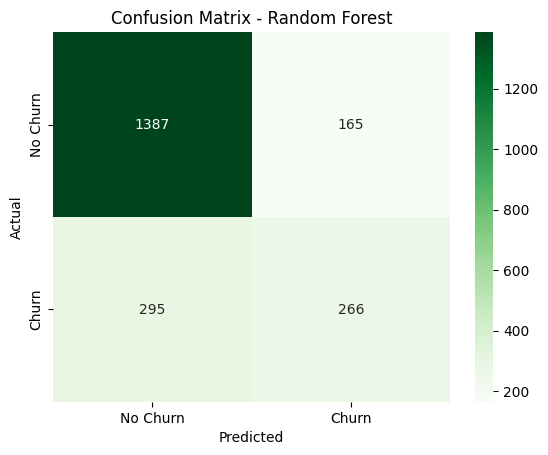

In [15]:
# Evaluate Random Forest
y_pred_rf = random_forest.predict(X_test)
print("\n--- Random Forest Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


--- Gradient Boosting Evaluation ---
Accuracy: 0.7974443918599148

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.66      0.50      0.57       561

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



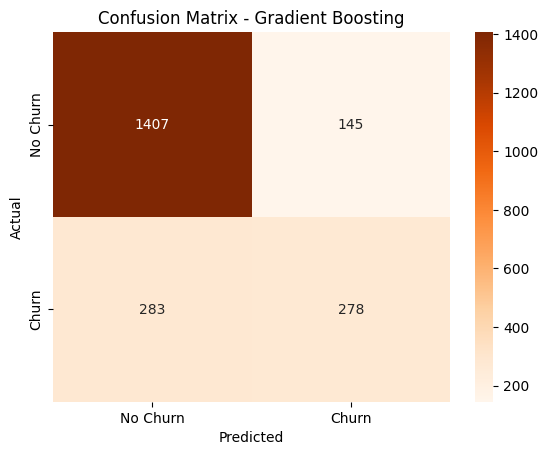

In [16]:
# Evaluate Gradient Boosting
y_pred_gb = gradient_boosting.predict(X_test)
print("\n--- Gradient Boosting Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

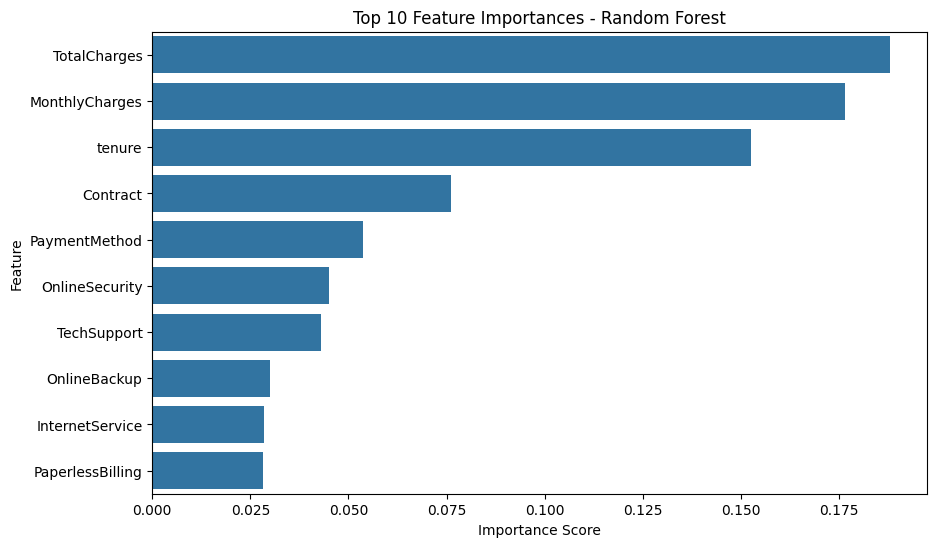

In [17]:
# Feature Importance (for tree-based models like Random Forest)
if hasattr(random_forest, 'feature_importances_'):
    feature_importances_rf = pd.Series(random_forest.feature_importances_, index=X_train.columns)
    feature_importances_rf_sorted = feature_importances_rf.sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances_rf_sorted.head(10), y=feature_importances_rf_sorted.head(10).index)
    plt.title('Top 10 Feature Importances - Random Forest')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show()
else:
    print("\nRandom Forest model does not have 'feature_importances_' attribute.")

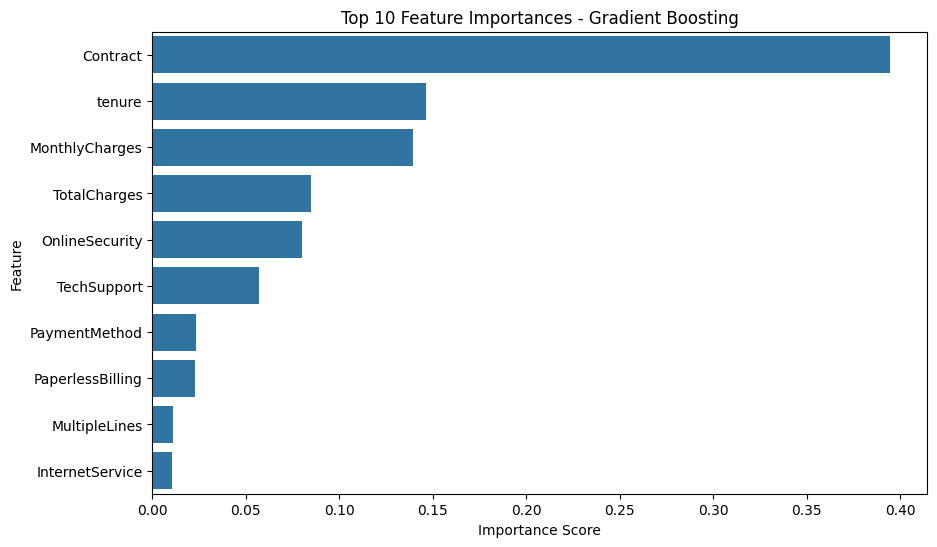

In [18]:
# Feature Importance (for tree-based models like Gradient Boosting)
if hasattr(gradient_boosting, 'feature_importances_'):
    feature_importances_gb = pd.Series(gradient_boosting.feature_importances_, index=X_train.columns)
    feature_importances_gb_sorted = feature_importances_gb.sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances_gb_sorted.head(10), y=feature_importances_gb_sorted.head(10).index)
    plt.title('Top 10 Feature Importances - Gradient Boosting')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show()
else:
    print("\nGradient Boosting model does not have 'feature_importances_' attribute.")

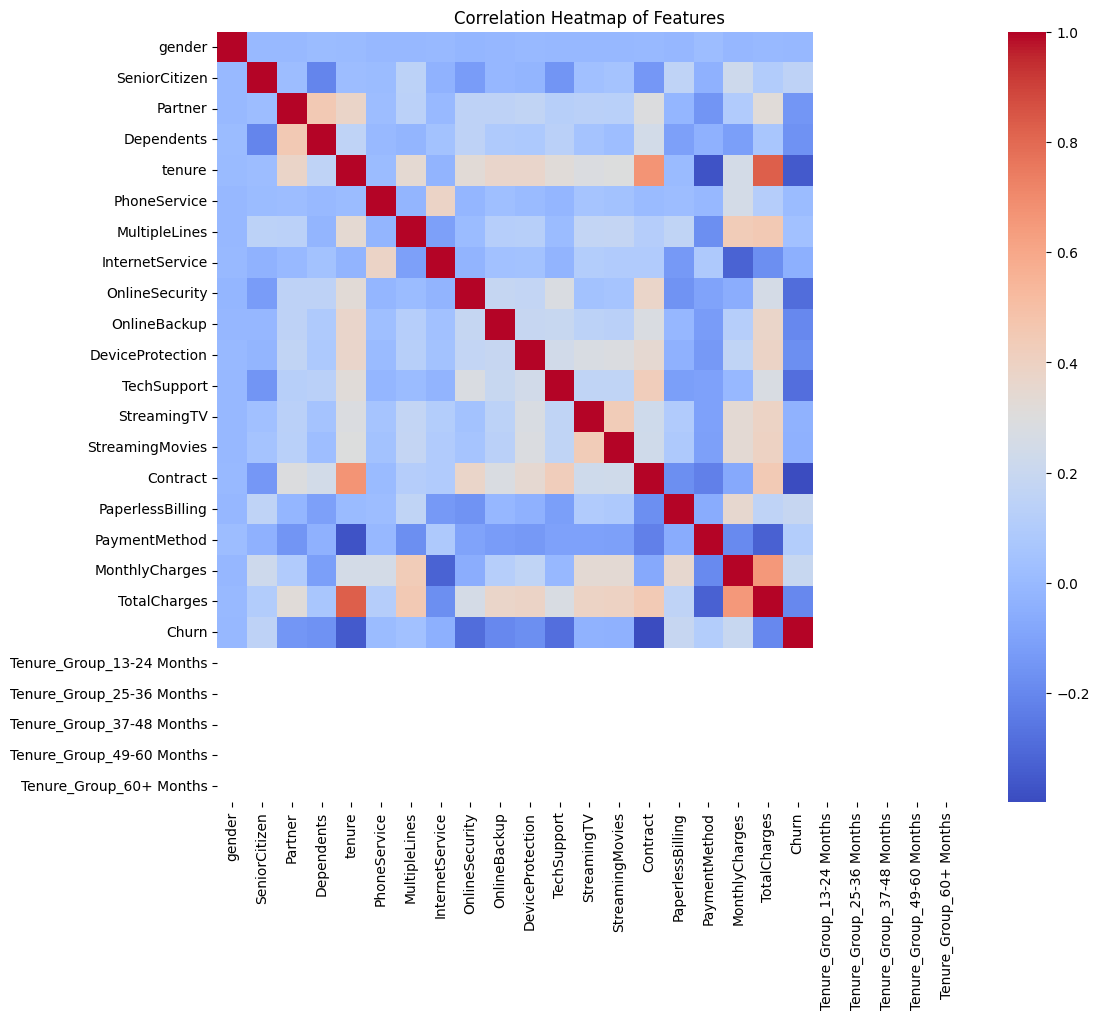

In [19]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()